# The Laplace Transform

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Communications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Inverse Transform

So far only the [(forward) Laplace transform](definition.ipynb) has been introduced. The Laplace transform features also an [inverse transform](https://en.wikipedia.org/wiki/Inverse_Laplace_transform). The inverse Laplace transform maps a complex-valued Laplace transform $X(s) \in \mathbb{C}$ with complex-valued independent variable $s \in \mathbb{C}$ into the complex-valued signal $x(t) \in \mathbb{C}$ with real-valued independent variable $t \in \mathbb{R}$. It can be shown that the inverse Laplace transform $x(t) = \mathcal{L}^{-1} \{ X(s) \}$ is uniquely determined for most practically relevant signals. This section discusses two different techniques for the computation of the inverse Laplace transform.

### Integral Formula

Using results from complex analysis, the inverse Laplace transform is given by the following complex line integral

\begin{equation}
x(t) = \frac{1}{2 \pi j} \int_{\sigma - j \infty}^{\sigma + j \infty} X(s) \, e^{s t} \; ds
\end{equation}

where $X(s) = \mathcal{L} \{ x(t) \}$ is assumed to be analytic in its simply connected region of convergence (ROC). The notation $\sigma \mp j \infty$ for the lower/upper integration limit denotes an arbitrary integration path which lies in the ROC and ranges from $\Im \{s\} = - \infty$ to $\Im \{s\} = + \infty$. The integration path can be chosen parallel to the imaginary axis but also all other paths in the ROC are possible. This results from [Cauchy's integral theorem](https://en.wikipedia.org/wiki/Cauchy's_integral_theorem). Two equivalent paths are shown in the following illustration

![Possible integration paths for the inverse Laplace transform](integration_paths.png)

where the blue line indicates the integration path and the gray area the ROC.

### Rational Laplace Transforms

Computing the inverse Laplace transform by above integral formula can be challenging. The [Cauchy residue theorem](https://en.wikipedia.org/wiki/Residue_theorem) provides a practically tractable solution for Laplace transforms $X(s) = \mathcal{L} \{ x(t) \}$ which are given as rational functions. It states that the value of a line integral of an holomorphic function over a closed contour is given by summing up its [residues](https://en.wikipedia.org/wiki/Residue_theorem). The residue is the value of the line integral for a path enclosing a singularity. Consequently, the inverse Laplace transform of a rational Laplace transform can be computed by summing up the individual contributions from its poles. This procedure is detailed in the following.

#### Basic Procedure

A rational Laplace transform $X(s)$ can be written in terms of its numerator and denominator polynomial

\begin{equation}
X(s) = \frac{\sum_{m=0}^{M} \beta_m s^m}{\sum_{n=0}^{N} \alpha_n s^n}
\end{equation}

where $M$, $N$ denote the order of the numerator and denominator polynomial and $\beta_m$, $\alpha_n$ their coefficients, respectively. It is assumed that $\alpha_N \neq 0$ and that $M \leq N$. If $M > N$, $X(s)$ can be decomposed by [polynomial division](https://en.wikipedia.org/wiki/Polynomial_long_division) into a sum of powers of $s$ and a rational function fulfilling $M \leq N$. 

Now a [partial fraction decomposition](https://en.wikipedia.org/wiki/Partial_fraction_decomposition) of $X(s)$ is performed resulting in

\begin{equation}
X(s) = A_0 + \sum_{\mu = 1}^{L} \sum_{\nu = 1}^{R_\mu} \frac{A_{\mu \nu}}{(s - s_{\infty \mu})^\nu}
\end{equation}

where $s_{\infty \mu}$ denotes the $\mu$-th unique pole of $X(s)$, $R_\mu$ its degree and $L$ the total number of different poles $\mu = 1 \dots L$. Using the known Laplace transforms (cf. [example for the modulation theorem](theorems.ipynb#Modulation-Theorem) or [table of selected transforms](table_theorems_transforms.ipynb#Selected-Transforms))

\begin{equation}
\mathcal{L} \{ t^n e^{-s_0 t} \epsilon(t) \} = \frac{n!}{(s + s_0)^{n+1}} \qquad \text{for } \Re \{ s \} > \Re \{ - s_0 \}
\end{equation}

and $\mathcal{L} \{ \delta(t) \} = 1$, together with the linearity of the Laplace transform yields a generic result for the inverse Laplace transform $x(t) = \mathcal{L}^{-1} \{ X(s) \}$ of a right-sided signal

\begin{equation}
x(t) = A_0 \cdot \delta(t) + \epsilon(t) \sum_{\mu = 1}^{L} e^{s_{\infty \mu} t} \sum_{\nu = 1}^{R_\mu} \frac{A_{\mu \nu} \, t^{\mu - 1}}{(\nu -1)!}
\end{equation}

It remains to compute the coefficients $A_0$ and $A_{\mu \nu}$ of the partial fraction decomposition. The constant coefficient $A_0$ is given as

\begin{equation}
A_0 = \lim_{s \to \infty} X(s)
\end{equation}

For a pole $s_{\infty \mu}$ with degree $R_\mu = 1$, the coefficient $A_{\mu 1}$ reads

\begin{equation}
A_{\mu 1} = \lim_{s \to s_{\infty \mu}} \left( X(s) \cdot (s - s_{\infty \mu}) \right)
\end{equation}

For a pole $s_{\infty \mu}$ of degree $R_\mu > 1$, the coefficients $A_{\mu \nu}$ are given as

\begin{equation}
A_{\mu \nu} = \frac{1}{(R_\mu - \nu)!} \lim_{s \to s_{\infty \mu}} \frac{d^{R_\mu - \nu}}{d s^{R_\mu - \nu}} \left( X(s) \cdot (s - s_{\infty \mu})^{R_\mu} \right)
\end{equation}

#### Classification of Poles

Above procedure allows to compute the inverse Laplace transform $x(t) = \mathcal{L}^{-1} \{ X(s) \}$ of a rational Laplace transform $X(s)$ in a systematic way. It is well suited for an algorithmic realization. However, for manual calculus it may be more efficient to classify the poles with respect to their location in the $s$-plane and their symmetries. The classification can then be used to formulate a modified partial fraction decomposition which limits the need for later algebraic simplification of the inverse Laplace transform. Three classes of poles are typically considered

| Type | Pole-Zero Diagramm | $X(s)$ | $x(t) = \mathcal{L}^{-1} \{ X(s) \} \qquad \qquad$ |
|---|:---:|:---:|:---:|
| Single complex pole | ![Single pole](single_pole.png) | $\frac{n!}{(s + s_0)^{n+1}}$ | $t^n e^{-s_0 t} \epsilon(t)$ |
| Conjugated imaginary poles | ![Conjugated imaginary poles](conjugated_imaginary_poles.png) | $\frac{A s + B}{s^2 + \omega_0^2}$ | $\begin{cases} \sin(\omega_0 t) \epsilon(t) \\ \cos(\omega_0 t) \epsilon(t) \end{cases}$ |
| Conjugated complex poles | ![](conjugated_complex_poles.png) | $\frac{A s + B}{(s + \sigma_0)^2 + \omega_0^2}$ | $\begin{cases} e^{-\sigma_0 t} \sin(\omega_0 t) \epsilon(t) \\ e^{-\sigma_0 t} \cos(\omega_0 t) \epsilon(t) \end{cases}$ |

where $s_0 \in \mathbb{C}$ and $\omega_0, \sigma_0 \in \mathbb{R}$. The expansion coefficients $A, B \in \mathbb{R}$ can be derived by comparison of coefficients. Whether $x(t)$ contains a sine or cosine depends on the coefficient $A$. If $A \neq 0$ then $x(t)$ contains a cosine (cf. [table of selected transforms](table_theorems_transforms.ipynb#Selected-Transforms)).

#### Example - Inverse transform of a rational Laplace transform

The inverse transform $x(t) = \mathcal{L}^{-1} \{ X(s) \}$ of 

\begin{equation}
X(s) = \frac{2 s^2 + 14 s + 124}{s^3 + 8 s^2 + 46 s + 68} \qquad \text{for } \Re \{s \} > -2
\end{equation}

is computed. First the function $X(s)$ is defined in `SymPy`

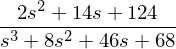

In [1]:
%matplotlib inline
import sympy as sym
sym.init_printing()

s = sym.symbols('s', complex=True)
t = sym.symbols('t', real=True)

X = (2*s**2 + 14*s + 124)/(s**3 + 8 * s**2 + 46*s + 68)
X

The poles of $X(s)$ are derived by computing the roots of the denominator polynomial

In [2]:
poles = sym.roots(sym.denom(X))
poles

The result is a real-valued pole and a conjugate complex pair of poles. According to above introduced classification of poles, the following ansatz is chosen for the partial fraction decomposition of the Laplace transform

\begin{equation}
X_p(s) = \frac{A}{s + 2} + \frac{B s + C}{s^2 + 6s + 34}
\end{equation}

The coefficients $A, B, C \in \mathbb{R}$ are derived by equating coefficients with $X(s)$

In [3]:
A, B, C = sym.symbols('A B C', real=True)

Xp = A / (s+2) + (B*s + C)/(s**2 + 6*s + 34)
coeffs = sym.solve(sym.Eq(X, Xp), (A, B, C))
coeffs

Introducing the coefficients into $X_p(s)$ yields

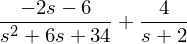

In [4]:
Xp = Xp.subs(coeffs)
Xp

The first fraction belongs to the complex conjugate poles. Applying [completion of the square](https://en.wikipedia.org/wiki/Completing_the_square) to the denominator, its inverse can be identified in the [table of Laplace transforms](table_theorems_transforms.ipynb#Transforms) as exponentially decaying cosine signal. Performing the inverse Laplace transform with `SymPy` yields

In [5]:
x1 = sym.inverse_laplace_transform(Xp.args[1], s, t)
x1

The second fraction belongs to a real-valued pole of first degree. Its inverse Laplace transform can be looked-up directly in the [table of Laplace transforms](table_theorems_transforms.ipynb#Transforms) as exponentially decaying signal. Performing the inverse Laplace transform again with `SymPy` yields

In [6]:
x2 = sym.inverse_laplace_transform(Xp.args[0], s, t)
x2

The inverse Laplace transform of $X(s)$ is given by summing up these two parts

In [7]:
x = x1 + x2
x

The resulting signal is plotted for illustration

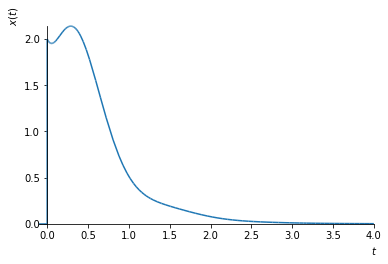

In [8]:
sym.plot(x, (t, -0.1, 4), xlabel='$t$', ylabel='$x(t)$');

The same result can be derived directly from $X(s)$ by using the inverse Laplace transform of `SymPy`

In [9]:
sym.inverse_laplace_transform(X, s, t).simplify()

**Exercise**

* Derive the inverse Laplace transform of $X(s)$ by manual calculation.
* Derive the inverse Laplace transform of
    \begin{equation}
    X(s) = \frac{1}{(s+1)(s+2)^2} \qquad \text{for } \Re \{ s \} \geq -1
    \end{equation}
    by manual calculation. Check your results with `SymPy`.

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Lecture Notes on Signals and Systems* by Sascha Spors.